0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
60945    0.0
60946    0.0
60947    0.0
60948    0.0
60949    0.0
Name: label, Length: 60950, dtype: float64
         d1        d2      d3        d4        d5        d6        d7  \
0 -0.090854 -0.160889  0.8201  0.107843  0.411146 -0.777403 -0.281074   
1 -0.090854 -0.160889  0.8201  0.107843  0.411146 -0.777403 -0.281074   

        d8        d9       d10  ...      d391      d392      d393      d394  \
0 -0.13661  0.646346  1.415352  ...  1.219487  0.637739 -0.566423 -0.685723   
1 -0.13661  0.646346  1.415352  ...  0.056689  0.101136 -0.725196 -0.421132   

       d395      d396      d397      d398      d399      d400  
0  0.544604 -0.336857 -0.371838 -0.409778  0.485328  1.267085  
1  0.460911 -0.457656  0.380200  1.863828  0.392103  1.351573  

[2 rows x 400 columns]


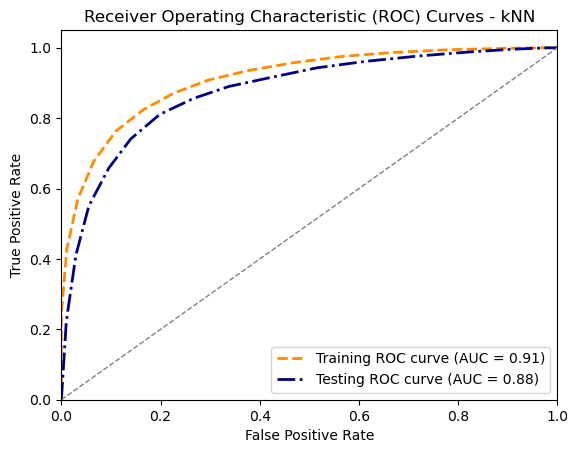

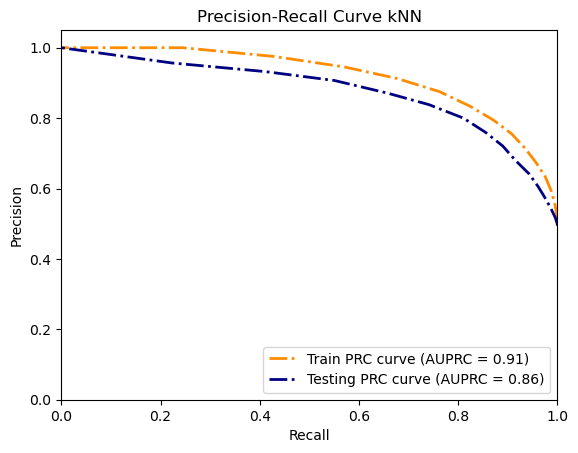

C:\Users\xdDeep\anaconda3-2023\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


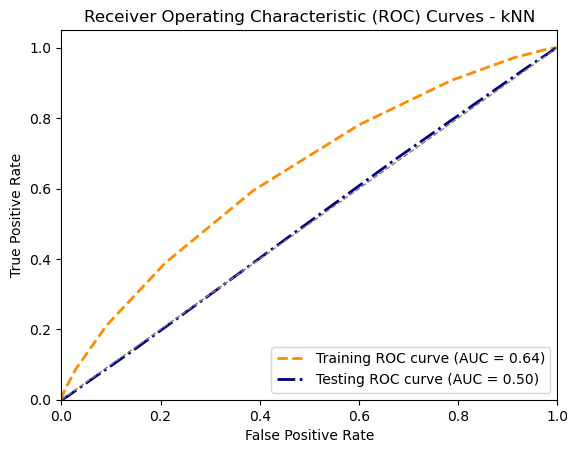

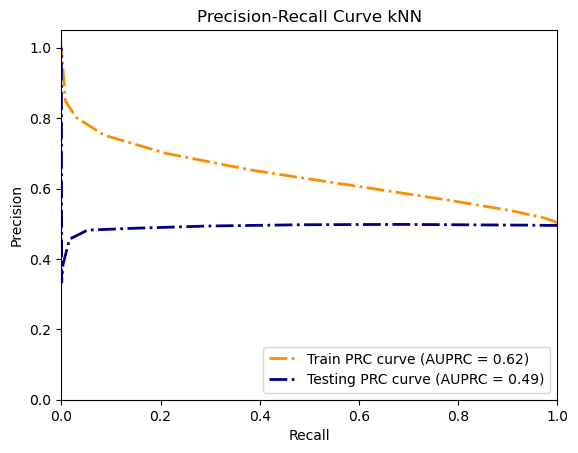

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# Load the CSV file into a pandas DataFrame
datfile = r'C:\Users\xdDeep\Desktop\RK-DD-DT-DDT\Robo-SMI-Dis-trainData.csv'  # for the smiles data
#datfile = r'C:\Users\xdDeep\Desktop\RK-DD-DT-DDT\DDpairstrainData.csv'  # for the DD pairs BioWV data

df = pd.read_csv(datfile)
#print("head 5:", df.head(5))

# Drop specified fields
df = df.drop(columns=['CID', 'DName', 'SEName'])     # for the DD pairs Smi-FP-PCA-BioWV data
#df = df.drop(columns=['cName', 'cName2', 'dName'])  # for the DD pairs BioWV data

yy = df['label']

X = df.drop(columns=['label'])
y = yy

# instantiate StandardScaler object
scaler = StandardScaler()
# fit and transform the dataframe X with StandardScaler
Xs = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = Xs


#y = pd.DataFrame(yy.sample(frac=1).reset_index(drop=True))

print(y)
print(X[:2])

##################################################

result=[]
for rnd in [9]:
    ##################################################
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd)
    ##################################################

    # Train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=15)
    knn.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = knn.predict_proba(X_train)[:, 1]
    y_test_pred = knn.predict_proba(X_test)[:, 1]

    # Compute the ROC curve and AUC for the training and testing sets
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    result.append([rnd, roc_auc_test, roc_auc_train])

#for rr in result:
#    print(rr)
    

    # Plot the ROC curves
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, linestyle='--', label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='navy', lw=2, linestyle='-.', label='Testing ROC curve (AUC = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves - kNN')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate the precision, recall, and thresholds
    from sklearn.metrics import precision_recall_curve, average_precision_score

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
    precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_pred)

    # Calculate the AUPRC
    auprc = average_precision_score(y_test, y_test_pred)
    auprc_train = average_precision_score(y_train, y_train_pred)

    # Plot the PRC curve
    plt.plot(recall_train, precision_train, color='darkorange', lw=2, linestyle='-.', label='Train PRC curve (AUPRC = %0.2f)' % auprc_train)
    plt.plot(recall, precision, color='navy', lw=2, linestyle='-.', label='Testing PRC curve (AUPRC = %0.2f)' % auprc)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve kNN')
    plt.legend(loc="lower right")

    plt.show()


    y_train = pd.DataFrame(y_train.sample(frac=1).reset_index(drop=True))
    y_test = pd.DataFrame(y_test.sample(frac=1).reset_index(drop=True))
    
        # Train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=15)
    knn.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = knn.predict_proba(X_train)[:, 1]
    y_test_pred = knn.predict_proba(X_test)[:, 1]

    # Compute the ROC curve and AUC for the training and testing sets
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    result.append([rnd, roc_auc_test, roc_auc_train])

#for rr in result:
#    print(rr)
    

    # Plot the ROC curves
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, linestyle='--', label='Training ROC curve (AUC = %0.2f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='navy', lw=2, linestyle='-.', label='Testing ROC curve (AUC = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves - kNN')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate the precision, recall, and thresholds
    from sklearn.metrics import precision_recall_curve, average_precision_score

    precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)
    precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_train_pred)

    # Calculate the AUPRC
    auprc = average_precision_score(y_test, y_test_pred)
    auprc_train = average_precision_score(y_train, y_train_pred)

    # Plot the PRC curve
    plt.plot(recall_train, precision_train, color='darkorange', lw=2, linestyle='-.', label='Train PRC curve (AUPRC = %0.2f)' % auprc_train)
    plt.plot(recall, precision, color='navy', lw=2, linestyle='-.', label='Testing PRC curve (AUPRC = %0.2f)' % auprc)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve kNN')
    plt.legend(loc="lower right")

    plt.show()

